In [1]:
%matplotlib inline

# Importing the data

The dataset can be downloaded at https://www.kaggle.com/datasets/athu1105/book-genre-prediction

In [2]:
import pandas as pd

# Read the data
df = pd.read_csv('../data/book_genre_dataset.csv')

The dataset contains 4,657 entries, each consisting of a book title, corresponding summary, and the target genre.

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4657 entries, 0 to 4656
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    4657 non-null   int64 
 1   title    4657 non-null   object
 2   genre    4657 non-null   object
 3   summary  4657 non-null   object
dtypes: int64(1), object(3)
memory usage: 145.7+ KB


,index,title,genre,summary
0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...
1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ..."
2,2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...
4,4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...


In [4]:
# check whether there any entries with null values
df.isnull().sum()

index      0
title      0
genre      0
summary    0
dtype: int64

# Preliminary data exploration

The first thing we would like to know is the distribution of class labels.

In [5]:
genre_counts = df['genre'].value_counts()

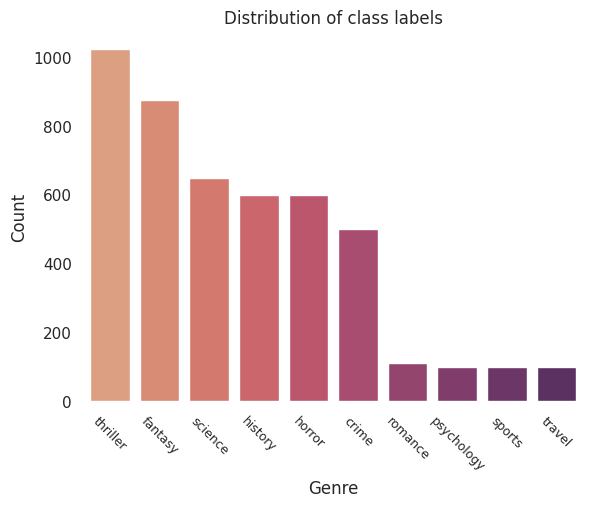

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='white')

sns.barplot(
    x = genre_counts.index,
    y = genre_counts,
    palette = 'flare',
)

plt.title("Distribution of class labels")
ax = plt.gca()
ax.set(xlabel="Genre", ylabel="Count")
ax.tick_params(axis='x', labelrotation=-45, labelsize=9)
sns.despine(bottom=True, left=True)


Text(0.5, 1.0, 'Distribution of class labels')

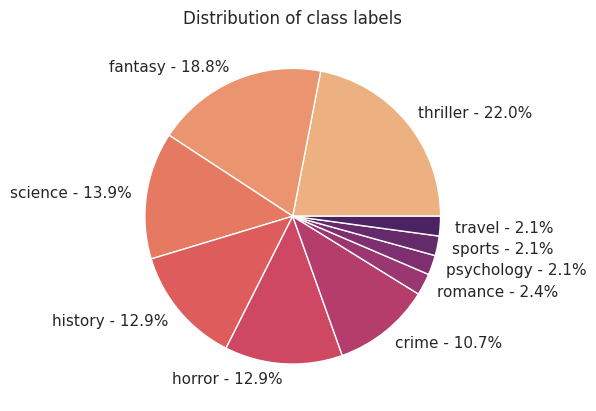

In [7]:
import numpy as np

# Get class distributions as percentages
percentages = 100 * genre_counts / genre_counts.sum()

# Define labels and colors for pie chart
pie_labels = [f"{x} - {y:.1f}%" for
            x,y in zip(genre_counts.index, percentages)]
pie_colors = plt.get_cmap('flare')(np.linspace(0,1,len(percentages)))

# Plot the pie chart
plt.pie(x=genre_counts,labels=pie_labels,colors=pie_colors)
plt.title("Distribution of class labels")

From the bar plot and pie charts above, we can see that the class labels are quite imbalanced:
- **travel**, **sports**, **psychology**, and **romance** each make up about 2% of the total dataset, making them well balanced relative to each other but not the rest of the dataset
- **thriller** and **fantasy** each make up a larger percentage of the data than any of the other genres
- **science**, **history**, **horror**, and **crime** are all quite well balanced with each other

# Data preprocessing and cleanup

In [8]:
import langdetect, re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer

def util_preprocess_text(text):
    """
    util_preprocess_text performs language detection,
    lowercasing, removing punctuation, removing stopwords,
    and lemmatization in preparation for classification.
    
    :param text: string to be preprocessed
    :return:     preprocessed string
    """
    
    # If the text is not in English, replace with empty string
    text = text if langdetect.detect(text) == 'en' else ''
    
    # make everything lowercase
    text = text.lower()
    
    # remove punctuation
    text = re.sub(r'[^\w\s]|_', '', text)
    
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([w for w in text.split() if w not in stop_words])
    
    # lemmatization
    wnl = WordNetLemmatizer()
    text = ' '.join([wnl.lemmatize(w) for w in text.split()])
    
    return text

[nltk_data] Downloading package stopwords to /home/mia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
df['combined'] = df['title'] + '. ' + df['summary']
df['combined_clean'] = df['combined'].apply(util_preprocess_text)

In [10]:
df.to_csv('../data/book_genre_preprocessed.csv')